In [1]:
""" Primeiro trabalho de IA
    Aluno:  Gabriel Ferrari Cipriano
    Tema:  Algoritmos de Busca e Clusterização
"""

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import itertools

from problema.clustering import Clustering
from problema.utils import *
from heuristics import grasp, simulated_annealing, genetic
from problema.method_runner import GraspRunner, GeneticRunner, SARunner, KmeansRunner

from sklearn.datasets import load_iris, load_wine
from pandas import read_csv

import json



# PRIMEIRA ETAPA - TREINO

In [2]:
# funcao de produto cartesiano p/ os hiperparmetros
def cartesian_product(lists, dtype):
    products = list(itertools.product(*lists))
    return np.asarray(products, dtype=dtype)

#### Inicializando dicionarios de datasets e métodos

In [3]:
datasets = {
    'Iris': {
        'problem': Clustering(load_iris()['data']),
        'ks': [3, 7,10,13,22]
    },
    'Wine': {
        'problem': Clustering(load_wine()['data']),
        'ks': [2, 6, 9, 11, 33]
    }
}

metodos = {
    'Simulated Annealing':{
        'runner' : SARunner,
        'params' : cartesian_product([[500., 100., 50.], [0.95, 0.85, 0.7], [350, 500]],
                                    dtype={'names':('t_zero', 'alfa', 'n_iter'),'formats':('f4', 'f4', 'i4')})
    },
    'GRASP': {
        'runner': GraspRunner,
        'params': cartesian_product([[20, 50, 100, 200, 350, 500], [5, 10, 15]],
                                    dtype={'names':('n_iter', 'n_best'),'formats':('i4', 'i4')})
    },
    'Genetic Algorithm': {
        'runner': GeneticRunner,
        'params': cartesian_product([[10, 30, 50], [0.75, 0.85, 0.95], [0.10, 0.20]],
                                    dtype={'names':('t_pop', 't_cross', 't_mut'),'formats':('i4', 'f4', 'f4')})
    }
}



### Dicionario que guardará os resultados

In [4]:
train_results = {
    'Simulated Annealing': {}, 
    "GRASP": {}, 
    "Genetic Algorithm": {}
}

## Rodar os treinos

In [5]:
for m_name, metodo in metodos.items():
    trainer = metodo['runner'](metodo['params'])
    for ds_name, dataset in datasets.items():
        print(m_name, ds_name, "train started")
        train_results[m_name][ds_name] = trainer.run_problem(dataset['problem'], dataset['ks'], times=10)

Simulated Annealing Iris train started
3 (500., 0.95, 350)
3 (500., 0.95, 500)
3 (500., 0.85, 350)
3 (500., 0.85, 500)
3 (500., 0.7, 350)
3 (500., 0.7, 500)
3 (100., 0.95, 350)
3 (100., 0.95, 500)
3 (100., 0.85, 350)
3 (100., 0.85, 500)
3 (100., 0.7, 350)
3 (100., 0.7, 500)
3 (50., 0.95, 350)
3 (50., 0.95, 500)
3 (50., 0.85, 350)
3 (50., 0.85, 500)
3 (50., 0.7, 350)
3 (50., 0.7, 500)
7 (500., 0.95, 350)
7 (500., 0.95, 500)
7 (500., 0.85, 350)
7 (500., 0.85, 500)
7 (500., 0.7, 350)
7 (500., 0.7, 500)
7 (100., 0.95, 350)
7 (100., 0.95, 500)
7 (100., 0.85, 350)
7 (100., 0.85, 500)
7 (100., 0.7, 350)
7 (100., 0.7, 500)
7 (50., 0.95, 350)
7 (50., 0.95, 500)
7 (50., 0.85, 350)
7 (50., 0.85, 500)
7 (50., 0.7, 350)
7 (50., 0.7, 500)
10 (500., 0.95, 350)
10 (500., 0.95, 500)
10 (500., 0.85, 350)
10 (500., 0.85, 500)
10 (500., 0.7, 350)
10 (500., 0.7, 500)
10 (100., 0.95, 350)
10 (100., 0.95, 500)
10 (100., 0.85, 350)
10 (100., 0.85, 500)
10 (100., 0.7, 350)
10 (100., 0.7, 500)
10 (50., 0.95, 35

In [15]:
# Exemplo de resultado:
display(train_results['GRASP']['Wine'][6]) # para k = 6

{'sse': {0: 650712.4712463054,
  1: 650712.4712463053,
  2: 650712.4712463053,
  3: 654098.9404665258,
  4: 647326.0020260847,
  5: 647326.0020260847,
  6: 647326.0020260847,
  7: 647326.0020260847,
  8: 647326.0020260847,
  9: 647326.0020260847,
  10: 647326.0020260847,
  11: 647326.0020260847,
  12: 647326.0020260847,
  13: 647326.0020260847,
  14: 647326.0020260847,
  15: 647326.0020260847,
  16: 647326.0020260847,
  17: 647326.0020260847},
 't': {0: 1.0357787999999801,
  1: 1.0346993999999086,
  2: 1.0368830000000344,
  3: 1.010866499999929,
  4: 1.0085723000000144,
  5: 1.0101959999999508,
  6: 1.0095569000000069,
  7: 1.0092148000000178,
  8: 1.0079254999999647,
  9: 1.005858699999908,
  10: 1.005944800000043,
  11: 1.004833600000029,
  12: 1.0051028999998834,
  13: 1.0023960000000443,
  14: 1.0047401000000264,
  15: 1.0058241999999609,
  16: 1.004764500000101,
  17: 1.0081632999998873},
 'zscore': {0: 1.2935483472730485,
  1: 1.293548347272987,
  2: 1.293548347272987,
  3: 3.084

### Train Result persistence in JSON

In [16]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [17]:
with open('train_results_persistence.json', 'w', encoding='utf-8') as outfile:
    json.dump(train_results, outfile, cls=NumpyEncoder, indent=2)

## PLOTANTO BLOXPOTS E SALVANDO NA SUBPASTA /plots

### Funções uteis

In [10]:
import copy
# Constroi um dataframe com os resultados (tempos e zscores)
def build_results_dataframe(data):
    results = copy.deepcopy(data)
    # Renaming for label purposes (iris: {3, 5,..} -> iris3, iris5...)
    for d in list(results.keys()):
        for p in list(results[d].keys()):
            for k in list(results[d][p].keys()):
                results[d][p+k] = pd.DataFrame(results[d][p][k])
            results[d].pop(p)
    return pd.DataFrame(results, columns = results.keys())

In [21]:
# Retorna uma informação (tempos ou zscores) como dataframe
def get_info_as_df(df, info, params):
    infos = []
    for problem in df.keys():
        infos.append(df[problem][info].to_numpy())
    infos = pd.DataFrame(np.asarray(infos), index=df.keys(), columns=params)
    return infos.T

In [76]:
# plot dos boxplots de zscores e tempos de um método
def plot_metodo_results(metodo_df, params, name, hparam_names, path):
    df = metodo_df

    #  Getting zscore df and tempos df
    zscores = get_info_as_df(df, "zscore", params)
    tempos = get_info_as_df(df, "t", params)


    # boxplot zscores and tempos
    figsize = (7, 5)
    _, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=figsize)
    ax1.set(xlabel='z-score', ylabel='Hiperparâmetros: (' + ', '.join(hparam_names) + ")")
    ax2.set(xlabel='Tempo')
    sns.boxplot(data=zscores.T, ax=ax1, orient="h", palette="Set3")
    sns.boxplot(data=tempos.T, ax=ax2,orient="h", palette="Set3")
    plt.suptitle(name)
    plt.tight_layout()
    # Comente a linha abaixo caso não deseje salvar
    plt.savefig(path+name+'_zscore_and_time_plot.png',dpi=200)

    plt.show()

### Loading from persistence

In [61]:
with open('train_results_persistence.json') as json_file:
        train_data = json.load(json_file)
train_data_df = build_results_dataframe(train_data)

### Boxplots

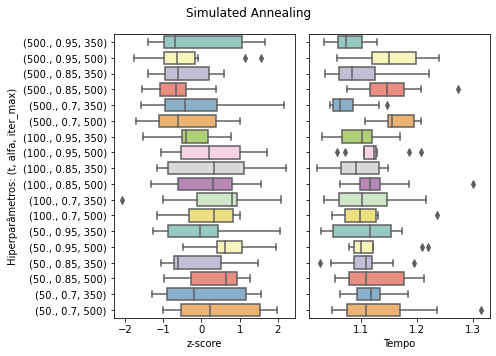

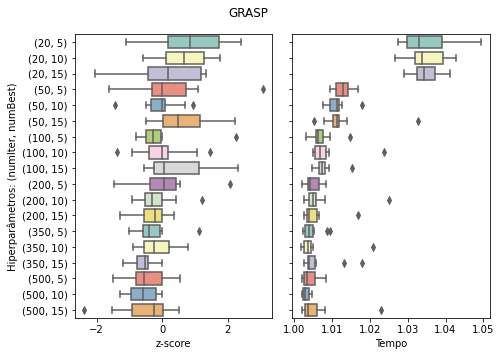

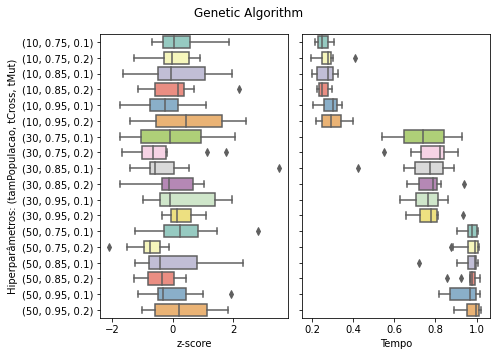

In [82]:
from pathlib import Path

params = {name: list(map(str,metodo['params'])) for name, metodo in metodos.items()}
param_names = {
    'Simulated Annealing': ('t','alfa','iter_max'),
    'GRASP': ('numIter', 'numBest'),
    'Genetic Algorithm': ('tamPopulacao', 'tCross', 'tMut')
}

plot_path = "plots/"
Path(plot_path).mkdir(parents=True, exist_ok=True)

for m in train_results.keys():
    plot_metodo_results(train_data_df[m], params[m], m, param_names[m], plot_path)

## Gerando tabelas pertinentes e salvando na subpasta /tables

In [125]:
from pathlib import Path

tables_path = "tables/"
Path(tables_path).mkdir(parents=True, exist_ok=True)

### tabela dos 5 melhores params por método

In [173]:
statuses = {}
for metodo_name, df in train_data_df.items():
    statuses[metodo_name] = pd.DataFrame()
    for info in ["sse", "t", "rank", "zscore"]:
        statuses[metodo_name][info.capitalize() + " Médio"] = np.mean(get_info_as_df(df, info, params[metodo_name]), axis=1)

    statuses[metodo_name].sort_values("Zscore Médio", axis=0, ascending=True, inplace=True)

    display(metodo_name, statuses[metodo_name].head(5))

    with open(tables_path + "train_5_bests.tex", 'a') as file:
        file.write(statuses[metodo_name].head(5).to_latex(float_format="%.2f", label="tab:train_5_bests_"+metodo_name[:7]))

'Simulated Annealing'

,Sse Médio,T Médio,Rank Médio,Zscore Médio
"(500., 0.85, 500)",591838.639917,1.154042,6.1,-0.710539
"(500., 0.85, 350)",592802.791353,1.097457,7.0,-0.450186
"(500., 0.7, 500)",597428.161800,1.162216,7.2,-0.445037
"(500., 0.95, 500)",600502.017800,1.157686,7.1,-0.405538
"(100., 0.95, 350)",594259.685626,1.096921,8.2,-0.289807


'GRASP'

,Sse Médio,T Médio,Rank Médio,Zscore Médio
"(500, 10)",568951.221907,1.003234,5.95,-0.595118
"(350, 15)",568943.561424,1.006187,6.65,-0.555714
"(500, 15)",569091.712709,1.005934,7.15,-0.532664
"(500, 5)",568927.549936,1.004137,6.75,-0.444985
"(200, 15)",568949.472032,1.005593,7.65,-0.318102


'Genetic Algorithm'

,Sse Médio,T Médio,Rank Médio,Zscore Médio
"(50, 0.75, 0.2)",590339.626406,0.971856,5.6,-0.834949
"(30, 0.75, 0.2)",605167.726897,0.781634,6.6,-0.402720
"(50, 0.85, 0.2)",592420.352582,0.969789,7.2,-0.390940
"(10, 0.95, 0.1)",591251.218068,0.287040,8.9,-0.293255
"(30, 0.85, 0.1)",591840.449945,0.744489,7.9,-0.106351


### Tabela Ranqueamento por problema

In [176]:
ranks = {}
for metodo_name, df in train_data_df.items():
    ranks[metodo_name] = get_info_as_df(df, "rank", params[metodo_name])
    ranks[metodo_name]["Média"] = np.mean(ranks[metodo_name], axis=1)

    ranks[metodo_name].sort_values("Média", axis=0, ascending=True, inplace=True)
    display(ranks[metodo_name])
    
    with open(tables_path + "train_ranks_" + metodo_name + '.tex', 'w') as file:
        file.write(ranks[metodo_name].to_latex(float_format="%.1f", label="tab:ranks_"+metodo_name[:7]))

,Iris3,Iris7,Iris10,Iris13,Iris22,Wine2,Wine6,Wine9,Wine11,Wine33,Média
"(500., 0.85, 500)",5.0,13.0,4.0,6.0,3.0,4.0,9.0,8.0,8.0,1.0,6.1
"(500., 0.85, 350)",5.0,12.0,3.0,3.0,12.0,3.0,7.0,10.0,5.0,10.0,7.0
"(500., 0.95, 500)",5.0,1.0,17.0,5.0,10.0,1.0,6.0,6.0,15.0,5.0,7.1
"(500., 0.7, 500)",14.0,4.0,10.0,14.0,1.0,5.0,1.0,7.0,13.0,3.0,7.2
"(100., 0.95, 350)",5.0,9.0,9.0,8.0,8.0,9.0,14.0,11.0,7.0,2.0,8.2
"(500., 0.95, 350)",5.0,17.0,2.0,4.0,5.0,2.0,8.0,17.0,17.0,7.0,8.4
"(50., 0.85, 350)",5.0,6.0,5.0,17.0,14.0,8.0,3.0,16.0,6.0,6.0,8.6
"(500., 0.7, 350)",14.0,18.0,8.0,12.0,6.0,6.0,13.0,2.0,1.0,9.0,8.9
"(50., 0.7, 350)",14.0,5.0,14.0,1.0,17.0,10.0,5.0,4.0,4.0,16.0,9.0
"(50., 0.95, 350)",5.0,7.0,18.0,2.0,4.0,12.0,12.0,9.0,16.0,11.0,9.6


,Iris3,Iris7,Iris10,Iris13,Iris22,Wine2,Wine6,Wine9,Wine11,Wine33,Média
"(500, 10)",9.5,1.0,6.0,3.0,9.0,9.5,7.5,4.0,2.0,8.0,5.95
"(350, 15)",9.5,8.0,5.0,8.0,6.0,9.5,7.5,3.0,7.0,3.0,6.65
"(500, 5)",9.5,3.0,11.0,6.0,3.0,9.5,7.5,12.0,5.0,1.0,6.75
"(500, 15)",9.5,2.0,1.0,13.0,2.0,9.5,7.5,11.0,3.0,13.0,7.15
"(200, 15)",9.5,5.0,8.0,10.0,11.0,9.5,7.5,9.0,1.0,6.0,7.65
"(350, 5)",9.5,15.0,4.0,7.0,8.0,9.5,7.5,8.0,8.0,2.0,7.85
"(350, 10)",9.5,4.0,14.0,11.0,4.0,9.5,7.5,6.0,13.0,5.0,8.35
"(100, 5)",9.5,7.0,7.0,5.0,5.0,9.5,7.5,10.0,17.0,10.0,8.75
"(200, 10)",9.5,10.0,3.0,12.0,16.0,9.5,7.5,7.0,4.0,9.0,8.75
"(100, 10)",9.5,17.0,16.0,9.0,10.0,9.5,7.5,2.0,11.0,4.0,9.55


,Iris3,Iris7,Iris10,Iris13,Iris22,Wine2,Wine6,Wine9,Wine11,Wine33,Média
"(50, 0.75, 0.2)",10.0,1.0,8.0,4.0,5.0,5.0,8.0,1.0,8.0,6.0,5.60
"(30, 0.75, 0.2)",5.0,2.0,4.0,1.0,3.0,8.0,7.0,16.0,17.0,3.0,6.60
"(50, 0.85, 0.2)",2.0,10.0,3.0,3.0,7.0,10.0,16.0,2.0,11.0,8.0,7.20
"(30, 0.85, 0.1)",18.0,13.0,7.0,6.0,1.0,9.0,4.0,4.0,5.0,12.0,7.90
"(50, 0.85, 0.1)",4.0,16.0,15.0,5.0,2.0,1.5,11.0,18.0,6.0,4.0,8.25
"(30, 0.75, 0.1)",1.0,18.0,16.0,2.0,11.0,5.0,1.0,13.0,18.0,2.0,8.70
"(10, 0.95, 0.1)",12.0,3.0,6.0,12.0,14.0,16.0,5.0,10.0,1.0,10.0,8.90
"(50, 0.95, 0.1)",17.0,4.0,14.0,9.0,12.0,5.0,13.0,7.0,7.0,7.0,9.50
"(30, 0.85, 0.2)",6.0,8.0,5.0,7.0,9.0,15.0,14.0,15.0,15.0,1.0,9.50
"(10, 0.75, 0.2)",13.0,15.0,9.0,15.0,4.0,13.0,2.0,9.0,12.0,9.0,10.10


### Tabela com melhor config 

In [175]:
best_ones = {}
for m in metodos:
    best_ones[m] = {}
    best_ones[m]["Melhor Rank"] = ranks[m].index[0]
    best_ones[m]["Melhor Z-score"] = statuses[m].index[0]

best_ones_df = pd.DataFrame(best_ones)
display(best_ones_df)

with open(tables_path + "train_best_ones.tex", 'w') as file:
        file.write(best_ones_df.to_latex(label="tab:train_best_ones"))

,Simulated Annealing,GRASP,Genetic Algorithm
Melhor Rank,"(500., 0.85, 500)","(500, 10)","(50, 0.75, 0.2)"
Melhor Z-score,"(500., 0.85, 500)","(500, 10)","(50, 0.75, 0.2)"


# FASE 2 - TESTE

## Inicializando dicts

In [1]:
SA_best_params = [(500., 0.85, 500)]
GRASP_best_params = [(500, 10)]
GA_best_params = [(50, 0.75, 0.2)]

In [2]:
from pandas import read_csv
import numpy as np
from sklearn.datasets import load_iris, load_wine

from problema.clustering import Clustering
from problema.method_runner import GraspRunner, GeneticRunner, SARunner, KmeansRunner

ionos = read_csv("ionosphere.data", header=None).iloc[:, :-1]

datasets = {
    'Iris': {
        'problem': Clustering(load_iris()['data']),
        'ks': [2, 4, 8, 11, 15, 17, 23, 28, 32, 50]
    },
    'Wine': {
        'problem': Clustering(load_wine()['data']),
        'ks': [3, 5, 13, 15, 20, 23, 25, 30, 41, 45]
    },
    'Ionosphere': {
        'problem': Clustering(np.asarray(ionos.values)),
        'ks': [2, 3, 5, 10, 15, 20, 25, 30, 40, 50]
    }
}

metodos = {
    'Simulated Annealing':{
        'runner' : SARunner,
        'params': np.asarray(SA_best_params, dtype={'names':('t_zero', 'alfa', 'n_iter'),'formats':('f4', 'f4', 'i4')})
    },
    'GRASP': {
        'runner': GraspRunner,
        'params': np.asarray(GRASP_best_params, dtype={'names':('n_iter', 'n_best'),'formats':('i4', 'i4')})
    },
    'Genetic Algorithm': {
        'runner': GeneticRunner,
        'params': np.asarray(GA_best_params, dtype={'names':('t_pop', 't_cross', 't_mut'),'formats':('i4', 'f4', 'f4')})
    },
    'KMeans': {
        'runner': KmeansRunner,
        'params': ["(no hparams)"]
    }
}

### Test Results dict

In [3]:
test_results = {k: {} for k in metodos}

## RODANDO TESTES

In [4]:
for m_name, metodo in metodos.items():
    tester = metodo['runner'](metodo['params'])
    for ds_name, dataset in datasets.items():
        print(m_name, ds_name, "test started")

        temp = tester.run_problem(dataset['problem'], dataset['ks'], times=20)
        test_results[m_name][ds_name] = dict({k: {'sse': v['sse'][0], 'time':v['t'][0]} for k,v in temp.items()})

Simulated Annealing Iris test started
2 (500., 0.85, 500)
4 (500., 0.85, 500)
8 (500., 0.85, 500)
11 (500., 0.85, 500)
15 (500., 0.85, 500)
17 (500., 0.85, 500)
23 (500., 0.85, 500)
28 (500., 0.85, 500)
32 (500., 0.85, 500)
50 (500., 0.85, 500)
Simulated Annealing Wine test started
3 (500., 0.85, 500)
5 (500., 0.85, 500)
13 (500., 0.85, 500)
15 (500., 0.85, 500)
20 (500., 0.85, 500)
23 (500., 0.85, 500)
25 (500., 0.85, 500)
30 (500., 0.85, 500)
41 (500., 0.85, 500)
45 (500., 0.85, 500)
Simulated Annealing Ionosphere test started
2 (500., 0.85, 500)
3 (500., 0.85, 500)
5 (500., 0.85, 500)
10 (500., 0.85, 500)
15 (500., 0.85, 500)
20 (500., 0.85, 500)
25 (500., 0.85, 500)
30 (500., 0.85, 500)
40 (500., 0.85, 500)
50 (500., 0.85, 500)
GRASP Iris test started
2 (500, 10)
4 (500, 10)
8 (500, 10)
11 (500, 10)
15 (500, 10)
17 (500, 10)
23 (500, 10)
28 (500, 10)
32 (500, 10)
50 (500, 10)
GRASP Wine test started
3 (500, 10)
5 (500, 10)
13 (500, 10)
15 (500, 10)
20 (500, 10)
23 (500, 10)
25 (500

### Test Result persistence in JSON


In [5]:
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [6]:
with open('test_results_persistence.json', 'w', encoding='utf-8') as outfile:
    json.dump(test_results, outfile, cls=NumpyEncoder, indent=2)

## Loading TEST RESULTS from persistence

In [7]:
with open('test_results_persistence.json') as json_file:
        test_data = json.load(json_file)

In [30]:
import copy
import pandas as pd
def get_test_info(test_data, info):
    info_dict = {k: {} for k in test_data}
    for m_name, m_data in test_data.items():
        for ds_name, ds_data in m_data.items():
            # info_dict[m_name] = {ds_name+k: ds_data[k][info] for k in ds_data}
            for k in ds_data:
                info_dict[m_name][ds_name[:5]+k] = ds_data[k][info]
    return pd.DataFrame(info_dict)

## BOXPLOT ZSCORE E TEMPO DOS METODOS 

In [31]:
from scipy import stats

test_sses = get_test_info(test_data, 'sse')
zscores_df = pd.DataFrame(stats.zscore(test_sses, axis=1), test_sses.index, test_sses.columns)

times_df = pd.DataFrame(get_test_info(test_data, 'time'))

display("zscores table:", zscores_df.head())
display(" time table:", times_df.head())

'zscores table:'

,Simulated Annealing,GRASP,Genetic Algorithm,KMeans
Iris2,1.731958,-0.585771,-0.560416,-0.585771
Iris4,0.698608,-0.982162,1.261398,-0.977844
Iris8,0.008406,-0.890206,1.628056,-0.746256
Iris11,-0.218880,-1.117062,1.619784,-0.283842
Iris15,-0.659237,-0.284449,1.704568,-0.760883


' time table:'

,Simulated Annealing,GRASP,Genetic Algorithm,KMeans
Iris2,1.103768,1.001866,0.960336,0.010842
Iris4,1.131684,1.002738,0.954005,0.021320
Iris8,1.146424,1.002867,1.013228,0.029591
Iris11,1.168289,1.003716,1.014218,0.075431
Iris15,1.196724,1.002685,1.007470,0.051617


In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_boxplot(dataset_df, xlabel=None, ylabel=None, title=None):
    # boxplot zscores and tempos
    _, ax = plt.subplots(figsize=(7, 4))
    ax.set(xlabel=xlabel, ylabel=ylabel)
    sns.boxplot(data=dataset_df, ax=ax, orient="h", palette="Set3")
    ax.set_title(title)
    plt.tight_layout()

### Exibindo boxplots e salvando na subpasta /plots

In [39]:
from pathlib import Path

plots_path = "plots/"
Path(plots_path).mkdir(parents=True, exist_ok=True)

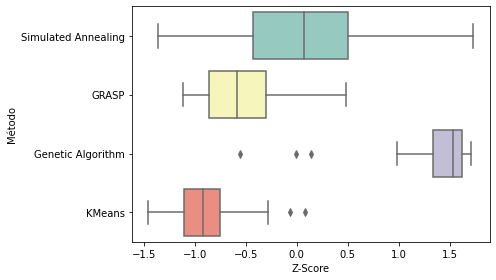

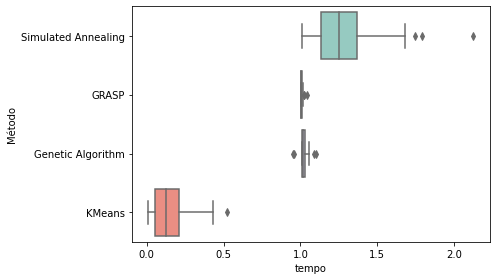

In [40]:
plot_boxplot(zscores_df,'Z-Score', 'Método')
plt.savefig(plots_path + "boxplot_test_zscore.png",dpi=200)
plt.show()

plot_boxplot(times_df,'tempo', 'Método')
plt.savefig(plots_path + "boxplot_test_time.png",dpi=200)
plt.show()

## TABELAS DE ZSCORES/TEMPOS
### Tabelas são salvas na subpasta /tables

In [35]:
from pathlib import Path

tables_path = "tables/"
Path(tables_path).mkdir(parents=True, exist_ok=True)

In [36]:
from scipy import stats

statuses_table = pd.DataFrame()
statuses_table["Z-score Médio"] = np.mean(zscores_df)
statuses_table["Z-score Desv. Padrão"] = np.std(zscores_df)
statuses_table["Tempo médio"] = np.mean(times_df)
statuses_table["Tempo Desv. Padrão"] = np.std(times_df)

display(statuses_table)

with open(tables_path + "test_status_table.tex", 'w') as file:
        file.write(statuses_table.to_latex(float_format="%.2f", label="tab:test_status"))



,Z-score Médio,Z-score Desv. Padrão,Tempo médio,Tempo Desv. Padrão
Simulated Annealing,0.071769,0.769328,1.311034,0.255719
GRASP,-0.531913,0.413152,1.008020,0.008487
Genetic Algorithm,1.332820,0.527988,1.022745,0.027782
KMeans,-0.872676,0.364165,0.149853,0.121617


## TABELA DE RANQUEAMENTO

In [38]:
ranks_df = pd.DataFrame(stats.rankdata(test_sses, axis=1), test_sses.index, test_sses.columns)
ranks_df.loc['Rank Médio'] = np.mean(ranks_df)

display(ranks_df)

with open(tables_path + "test_ranks.tex", 'w') as file:
        file.write(ranks_df.to_latex(float_format="%.2f", label="tab:test_ranks"))

,Simulated Annealing,GRASP,Genetic Algorithm,KMeans
Iris2,4.000000,2.000000,3.000000,1.0
Iris4,3.000000,1.000000,4.000000,2.0
Iris8,3.000000,1.000000,4.000000,2.0
Iris11,3.000000,1.000000,4.000000,2.0
Iris15,2.000000,3.000000,4.000000,1.0
Iris17,3.000000,2.000000,4.000000,1.0
Iris23,3.000000,2.000000,4.000000,1.0
Iris28,3.000000,2.000000,4.000000,1.0
Iris32,3.000000,2.000000,4.000000,1.0
Iris50,3.000000,2.000000,4.000000,1.0


## TESTE PAREADO

In [51]:
from scipy.stats import ttest_rel, wilcoxon

# Gerando tabela do teste t e wilcoxon de cada dataset
score_values = zscores_df.T.values
p_value_df = np.zeros((len(score_values),len(score_values)))

# Rodando ttest e wilcoxon
for i, r1 in enumerate(score_values):
    for j, r2 in enumerate(score_values):
        p_value_df[i,j] = ttest_rel(r1, r2)[1] if j >= i else wilcoxon(r1, r2)[1] 

teste_pareado_df = pd.DataFrame(p_value_df, columns=zscores_df.columns, index=zscores_df.columns)
display(teste_pareado_df)

# torna negrito resultados rejeitados (menores ou iguais que 0.05)
def bold_formatter(x):
    return "\\textbf{%.5f}" % x if x <= 0.05 else '%.5f' % x

# Aplicar o formatador para todas as colunas
formatters = [bold_formatter]*len(teste_pareado_df.columns)

# Salva tabela latex no subdiretorio /tables
Path(tables_path).mkdir(parents=True, exist_ok=True)
with open(tables_path + 'teste_pareado.tex', 'w') as file:
    file.write(teste_pareado_df.to_latex(formatters=formatters, escape=False, index=False, label="tab:teste_pareado"))

,Simulated Annealing,GRASP,Genetic Algorithm,KMeans
Simulated Annealing,NaN,0.004428,5.665360e-06,1.177630e-05
GRASP,0.009842,NaN,3.818702e-16,5.167079e-03
Genetic Algorithm,0.000283,0.000002,NaN,1.140005e-17
KMeans,0.000115,0.006284,1.734398e-06,NaN


## MELHOR MÉTODO GERAL:

In [74]:
melhor_metodo = statuses_table.copy()
melhor_metodo["Rank Médio"] = ranks_df.loc["Rank Médio"].T
melhor_metodo.sort_values("Z-score Médio", axis=0, ascending=True, inplace=True)
del melhor_metodo["Z-score Desv. Padrão"]
del melhor_metodo["Tempo Desv. Padrão"]

display(melhor_metodo.head(1))

# Salva tabela latex no subdiretorio /tables
Path(tables_path).mkdir(parents=True, exist_ok=True)
with open(tables_path + 'teste_melhor_metodo.tex', 'w') as file:
    file.write(melhor_metodo.head(2).to_latex(float_format="%.3f",  label="tab:teste_melhor_metodo"))

,Z-score Médio,Tempo médio,Rank Médio
KMeans,-0.872676,0.149853,1.5
